In [4]:
import torch
from utils import BNN
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def plotTubeMeanBig(XT, XTBig, y, thetas, ns):
    """ Comme celui d'avant mais sur un intervalle plus grands
    Parameters
    ----------
    XT : torch.Tensor
        tenseur d'entrée
    y : torch.Tensor 
        Solution bruité
    thetas : list of torch.Tensor
        un échantillion de poids
    ns : list 
        Le nombre de neurones par couche

    Returns
    -------
    """
    ymax = torch.max(y)
    ymin = torch.min(y)
    yspan = ymax - ymin

    N = thetas.shape[1]
    y_hats = torch.concat(
        tuple([FNN(ns, thetas[:, i]).forward(XT) for i in range(0, N)]), 1)

    std = torch.sqrt(y_hats.var(1))
    mean = y_hats.mean(1)

    binf = (mean - 3*std).reshape(y.shape).detach().numpy()
    bsup = (mean + 3*std).reshape(y.shape).detach().numpy()

    plt.fill_between(XT.ravel(), binf[:, 0],
                     bsup[:, 0], color='gray', label="[]")
    plt.plot(XT, (mean).reshape(y.shape).detach().numpy(),
             label="Mean", color="r")
    plt.scatter(XT, y, marker='+', color='k')
    plt.ylim(ymin - 0.01*yspan, ymax + 0.01*yspan)
    plt.legend()

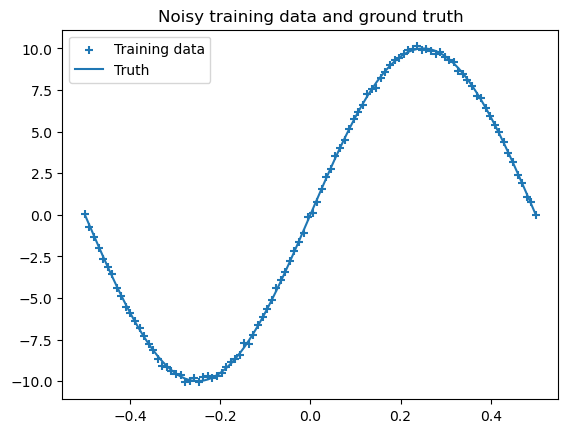

In [11]:
# Definition de la fonction de test
def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return 10*np.sin(2*np.pi*x) + epsilon

# def f(x, sigma):
#     epsilon = np.random.randn(*x.shape) * sigma
#  

# Paramétrage des données d'entrainements
train_size = 100
noise = 0.1
# Pour sin
xmin = -0.5
xmax = 0.5
c = 2
xminBig = xmin - c * (xmax - xmin)
xmaxBig = xmax + c * (xmax - xmin)

# # Pour cos
# xmin = -3.5
# xmax = 3.5

X = np.linspace(xmin, xmax, train_size).reshape(-1, 1)
Xbig = np.linspace(xminBig, xmaxBig, train_size* (2*c + 1)).reshape(-1,1)
# X = np.linspace(-np.pi, np.pi, train_size).reshape(-1, 1)

y = f(X, sigma=noise)
y_true = f(X, sigma=0.0)


# On affiche tout ça
plt.scatter(X, y, marker='+', label='Training data')
plt.plot(X, y_true, label='Truth')
plt.title('Noisy training data and ground truth')
plt.legend()
plt.show()

In [12]:
XT = torch.Tensor(X).reshape(X.shape)
XTBig = torch.Tensor(Xbig).reshape(Xbig.shape)

y = torch.Tensor(y).reshape(y.shape)
y_true = torch.Tensor(y_true).reshape(y_true.shape)


In [8]:
# Hypperparamètres
N = 100
ns = [1, 3, 3, 1]

lll = BNN.modelSize(ns)

# L'a priopri gaussien N(0, I) pour les poids
thetas = torch.randn(lll, N)

# On evalue tout ça
y_hats = torch.concat(
    tuple([BNN.FNN(ns, thetas[:, i]).forward(XT) for i in range(0, N)]), 1)

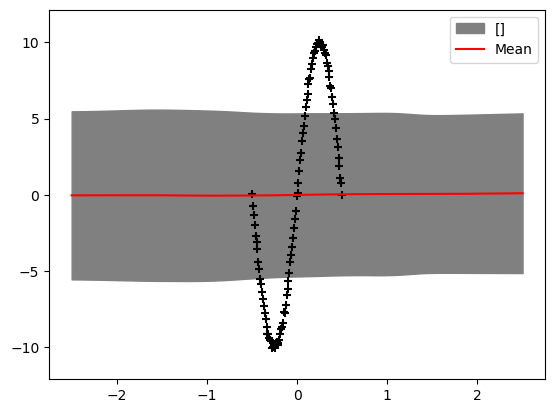

In [35]:
ymax = torch.max(y)
ymin = torch.min(y)
yspan = ymax - ymin

N = thetas.shape[1]
y_hats = torch.concat(
    tuple([BNN.FNN(ns, thetas[:, i]).forward(XTBig) for i in range(0, N)]), 1)

std = torch.sqrt(y_hats.var(1))
mean = y_hats.mean(1)

binf = (mean - 3*std).reshape((XTBig.shape[0],1)).detach().numpy()
bsup = (mean + 3*std).reshape((XTBig.shape[0],1)).detach().numpy()

plt.fill_between(XTBig.ravel(), binf[:, 0],
                    bsup[:, 0], color='gray', label="[]")
plt.plot(XTBig, (mean).reshape((XTBig.shape[0],1)).detach().numpy(),
            label="Mean", color="r")
plt.scatter(XT, y, marker='+', color='k')
plt.ylim(ymin - 0.1*yspan, ymax + 0.1*yspan)
plt.legend()

In [21]:
y.shape

torch.Size([100, 1])

In [30]:
XTBig.shape[0]

500

In [20]:
q25.shape

(500,)